# Let there be light: Predicting the installed solar capacity

## EDA

**For this questions I relied on two main datasets:**
**1. Global Solar Photovoltaic Installed Capacity (2020)**
**2. Global Photovoltaic Potential by each Country**
**Based on the latter, I examined and analyzed the data to extract the three countries with the higher photovoltaic potential in the Latin-American and Caribbean region.**

**The Latin-America and Caribbean region corresponds to the LCR World Bank region**



In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [139]:
df = pd.read_csv('pv_installed.csv', skiprows=0,delimiter=',')

In [140]:
df.head()

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001112
1,Africa,NaN,1997,0.003137
2,Africa,NaN,1998,0.005162
3,Africa,NaN,1999,0.008199
4,Africa,NaN,2000,0.010927


In [189]:
for i in df['Entity'].unique():
    print(i)

Africa
Africa (BP)
Algeria
Argentina
Asia
Asia Pacific (BP)
Australia
Austria
Belgium
Brazil
Bulgaria
CIS (BP)
Canada
Chile
China
Czechia
Denmark
Egypt
Europe
Europe (BP)
France
Germany
Greece
High-income countries
Honduras
Hungary
India
Israel
Italy
Japan
Jordan
Lower-middle-income countries
Malaysia
Mexico
Middle East (BP)
Morocco
Netherlands
North America
North America (BP)
Oceania
Other Africa (BP)
Other Asia Pacific (BP)
Other CIS (BP)
Other Europe (BP)
Other Middle East (BP)
Other South and Central America (BP)
Pakistan
Philippines
Poland
Portugal
Romania
Russia
Slovakia
South Africa
South America
South Korea
South and Central America (BP)
Spain
Sweden
Switzerland
Taiwan
Thailand
Turkey
Ukraine
United Arab Emirates
United Kingdom
United States
Upper-middle-income countries
Vietnam
World


In [142]:
df.shape

(1815, 4)

In [143]:
df.dtypes

Entity             object
Code               object
Year                int64
Solar Capacity    float64
dtype: object

In [144]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

In [145]:
df.isna().sum()

Entity              0
Code              572
Year                0
Solar Capacity      0
dtype: int64

In [146]:
df = df[['Entity', 'Year','Solar Capacity']]

In [147]:
df = df.loc[df['Solar Capacity'] > 0]

In [205]:
chile = df[df['Entity'] == 'Chile']
chile.reset_index(inplace=True)
chile.reset_index(inplace=True)
chile.drop(columns=['index'])
chile.columns = chile.columns.str.replace('level_0', 'Year0')
mexico = df[df['Entity'] == 'Mexico']
mexico.reset_index(inplace=True)
mexico.reset_index(inplace=True)
mexico.drop(columns=['index'])
mexico.columns = mexico.columns.str.replace('level_0', 'Year0')
greece = df[df['Entity'] == 'Greece']
greece.reset_index(inplace=True)
greece.reset_index(inplace=True)
greece.drop(columns=['index'])
greece.columns = chile.columns.str.replace('level_0', 'Year0')
france = df[df['Entity'] == 'France']
france.reset_index(inplace=True)
france.reset_index(inplace=True)
france.drop(columns=['index'])
france.columns = chile.columns.str.replace('level_0', 'Year0')


## Def linear functions

In [149]:
def lmplot(x,y, data):
    sns.lmplot(x=x,y=y,data = data, aspect = 2, height=6)
    plt.xlabel('Year')
    plt.ylabel('Solar Capacity')
    plt.title('Solar Capacity by Year')

In [203]:
def regmodel(x,y,year):
    regression_model = linear_model.LinearRegression()
    regression_model.fit(X = pd.DataFrame(x), y = y)
    print('Linear model intercept: ', regression_model.intercept_)
    print('Linear model coefficient', regression_model.coef_)
    print('Linear model Accuracy Score: ', regression_model.score(X = pd.DataFrame(x), y = y))
    targetyear = year - 2021
    print('Target year = ', targetyear)
    print('Linear Estimate for Solar Capacity in target year: ', regression_model.predict([[targetyear]]))
    plt.plot(x, regression_model.coef_ * y + regression_model.intercept_)
    plt.show()

## Chile

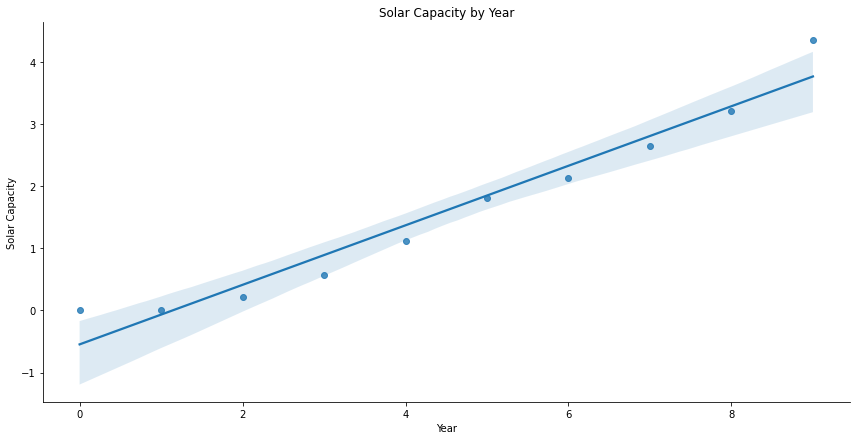

In [172]:
lmplot('Year0', 'Solar Capacity', chile)

Linear model intercept:  -0.5464661931818178
Linear model coefficient [0.47930677]
Linear model Accuracy Score:  0.9534737165736078
Target year =  9
Linear Estimate for Solar Capacity in target year:  [3.76729476]


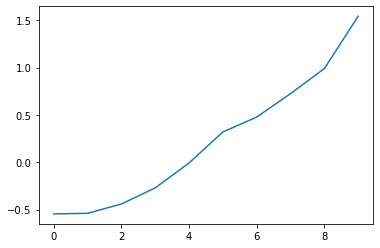

In [201]:
regmodel(chile['Year0'], chile['Solar Capacity'], 2030)

## Mexico

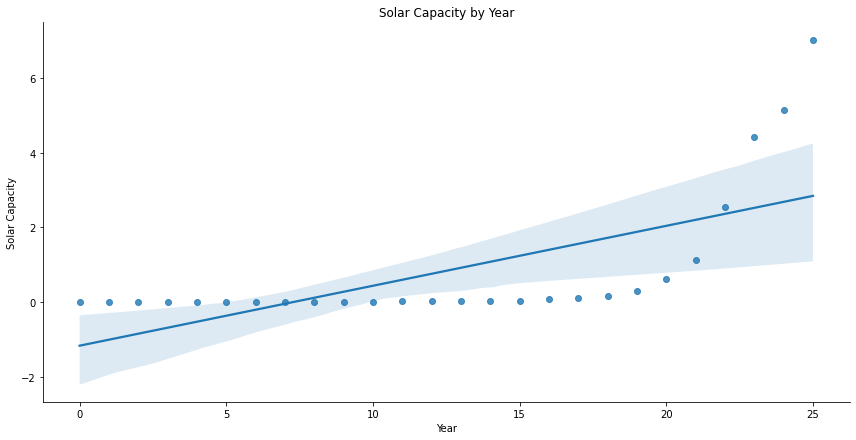

In [177]:
lmplot('Year0', 'Solar Capacity', mexico)

Linear model intercept:  -1.1650906660617912
Linear model coefficient [0.16038771]
Linear model Accuracy Score:  0.44056819243782785
Target year =  9
Linear Estimate for Solar Capacity in target year:  [0.27839871]


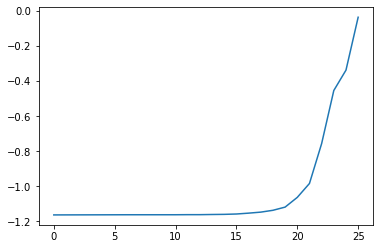

In [204]:
regmodel(mexico['Year0'], mexico['Solar Capacity'], 2030)

## Greece

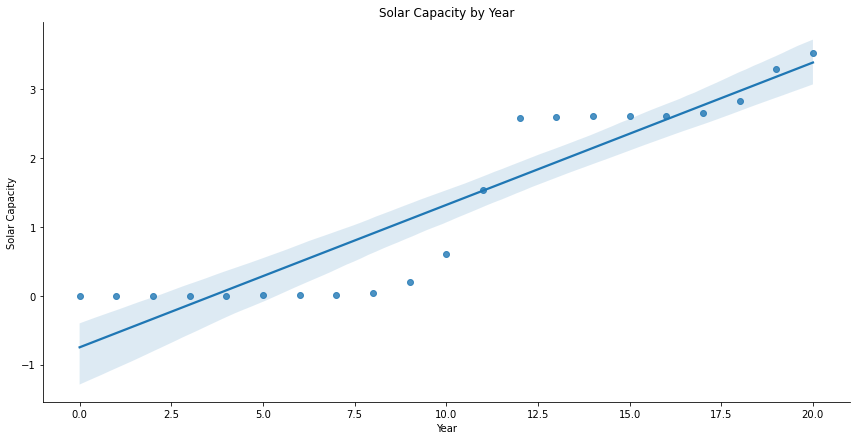

In [206]:
lmplot('Year0', 'Solar Capacity', greece)

Linear model intercept:  -0.7481309597791528
Linear model coefficient [0.2068065]
Linear model Accuracy Score:  0.8606910295717543
Target year =  9
Linear Estimate for Solar Capacity in target year:  [1.1131275]


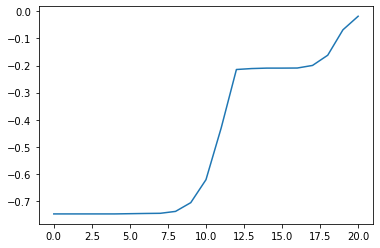

In [208]:
regmodel(greece['Year0'], greece['Solar Capacity'], 2030)

## France

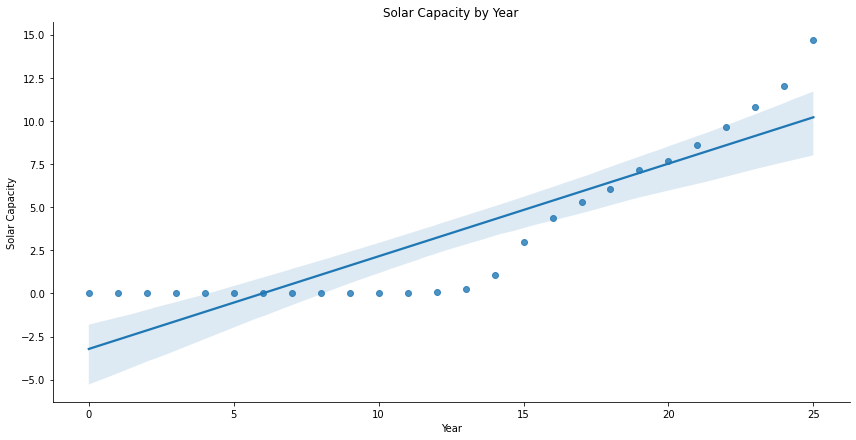

In [207]:
lmplot('Year0', 'Solar Capacity', france)

Linear model intercept:  -3.2193387378138323
Linear model coefficient [0.53711537]
Linear model Accuracy Score:  0.7936740858087673
Target year =  9
Linear Estimate for Solar Capacity in target year:  [1.61469961]


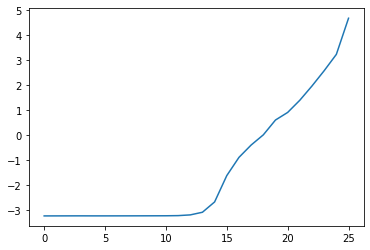

In [209]:
regmodel(france['Year0'], france['Solar Capacity'], 2030)